## Dubai Property Price Prediction

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
df = pd.read_csv("D:\Practice\properties\properties_data.csv")

In [3]:
df

,id,neighborhood,latitude,longitude,price,size_in_sqft,price_per_sqft,no_of_bedrooms,no_of_bathrooms,quality,maid_room,unfurnished,balcony,barbecue_area,built_in_wardrobes,central_ac,childrens_play_area,childrens_pool,concierge,covered_parking,kitchen_appliances,lobby_in_building,maid_service,networked,pets_allowed,private_garden,private_gym,private_jacuzzi,private_pool,security,shared_gym,shared_pool,shared_spa,study,vastu_compliant,view_of_landmark,view_of_water,walk_in_closet
0,5528049,Palm Jumeirah,25.113208,55.138932,2700000,1079,2502.32,1,2,Medium,False,False,True,True,False,True,True,False,True,False,True,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,True,False
1,6008529,Palm Jumeirah,25.106809,55.151201,2850000,1582,1801.52,2,2,Medium,False,False,True,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,True,False
2,6034542,Jumeirah Lake Towers,25.063302,55.137728,1150000,1951,589.44,3,5,Medium,True,True,True,False,True,False,False,False,False,True,False,False,False,False,False,False,False,True,False,True,True,True,False,False,False,True,True,True
3,6326063,Culture Village,25.227295,55.341761,2850000,2020,1410.89,2,3,Low,False,True,True,False,False,False,False,False,True,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
4,6356778,Palm Jumeirah,25.114275,55.139764,1729200,507,3410.65,0,1,Medium,False,False,False,False,True,True,False,False,False,True,True,False,False,True,False,False,False,False,False,True,True,True,True,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1900,7705450,Mohammed Bin Rashid City,25.176892,55.310712,1500000,1087,1379.94,2,2,Ultra,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,False,False,False,True,True,True,True,True,True,True,True,True
1901,7706287,Mohammed Bin Rashid City,25.166145,55.276684,1230000,760,1618.42,1,2,Medium,False,False,True,False,True,True,True,False,True,False,True,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,True,True
1902,7706389,Dubai Creek Harbour (The Lagoons),25.206500,55.345056,2900000,1930,1502.59,3,5,Medium,True,True,True,False,False,True,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False
1903,7706591,Jumeirah Village Circle,25.073858,55.229844,675000,740,912.16,1,2,Medium,False,True,True,False,True,True,True,False,False,True,True,False,False,False,False,True,False,False,False,True,True,True,False,False,False,False,True,True


In [4]:
df.isnull().sum()

id                     0
neighborhood           0
latitude               0
longitude              0
price                  0
size_in_sqft           0
price_per_sqft         0
no_of_bedrooms         0
no_of_bathrooms        0
quality                0
maid_room              0
unfurnished            0
balcony                0
barbecue_area          0
built_in_wardrobes     0
central_ac             0
childrens_play_area    0
childrens_pool         0
concierge              0
covered_parking        0
kitchen_appliances     0
lobby_in_building      0
maid_service           0
networked              0
pets_allowed           0
private_garden         0
private_gym            0
private_jacuzzi        0
private_pool           0
security               0
shared_gym             0
shared_pool            0
shared_spa             0
study                  0
vastu_compliant        0
view_of_landmark       0
view_of_water          0
walk_in_closet         0
dtype: int64

In [5]:
df.duplicated().sum()

np.int64(0)

In [6]:
df.shape

(1905, 38)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1905 entries, 0 to 1904
Data columns (total 38 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   1905 non-null   int64  
 1   neighborhood         1905 non-null   object 
 2   latitude             1905 non-null   float64
 3   longitude            1905 non-null   float64
 4   price                1905 non-null   int64  
 5   size_in_sqft         1905 non-null   int64  
 6   price_per_sqft       1905 non-null   float64
 7   no_of_bedrooms       1905 non-null   int64  
 8   no_of_bathrooms      1905 non-null   int64  
 9   quality              1905 non-null   object 
 10  maid_room            1905 non-null   bool   
 11  unfurnished          1905 non-null   bool   
 12  balcony              1905 non-null   bool   
 13  barbecue_area        1905 non-null   bool   
 14  built_in_wardrobes   1905 non-null   bool   
 15  central_ac           1905 non-null   b

In [8]:
df.head()

,id,neighborhood,latitude,longitude,price,size_in_sqft,price_per_sqft,no_of_bedrooms,no_of_bathrooms,quality,maid_room,unfurnished,balcony,barbecue_area,built_in_wardrobes,central_ac,childrens_play_area,childrens_pool,concierge,covered_parking,kitchen_appliances,lobby_in_building,maid_service,networked,pets_allowed,private_garden,private_gym,private_jacuzzi,private_pool,security,shared_gym,shared_pool,shared_spa,study,vastu_compliant,view_of_landmark,view_of_water,walk_in_closet
0,5528049,Palm Jumeirah,25.113208,55.138932,2700000,1079,2502.32,1,2,Medium,False,False,True,True,False,True,True,False,True,False,True,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,True,False
1,6008529,Palm Jumeirah,25.106809,55.151201,2850000,1582,1801.52,2,2,Medium,False,False,True,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,True,False
2,6034542,Jumeirah Lake Towers,25.063302,55.137728,1150000,1951,589.44,3,5,Medium,True,True,True,False,True,False,False,False,False,True,False,False,False,False,False,False,False,True,False,True,True,True,False,False,False,True,True,True
3,6326063,Culture Village,25.227295,55.341761,2850000,2020,1410.89,2,3,Low,False,True,True,False,False,False,False,False,True,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
4,6356778,Palm Jumeirah,25.114275,55.139764,1729200,507,3410.65,0,1,Medium,False,False,False,False,True,True,False,False,False,True,True,False,False,True,False,False,False,False,False,True,True,True,True,False,False,True,True,False


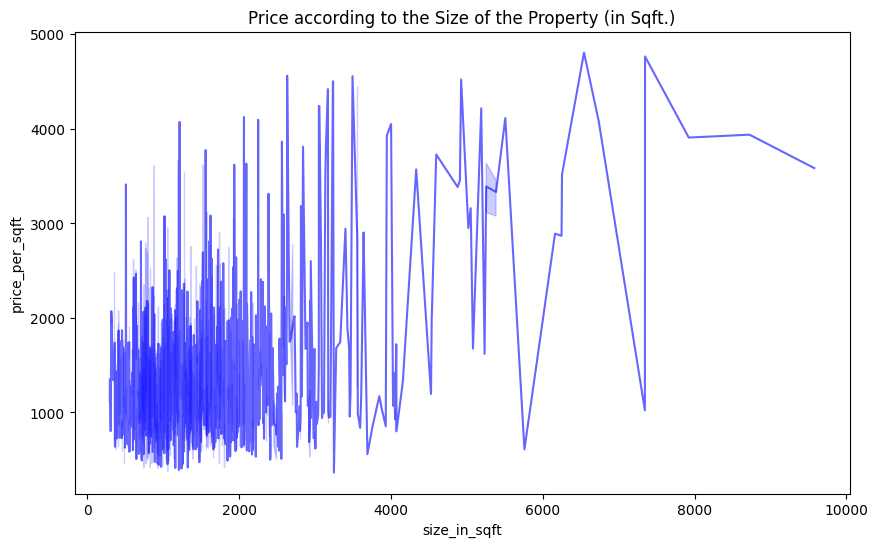

In [9]:
plt.figure(figsize=(10,6))
sns.lineplot(x = 'size_in_sqft', y = 'price_per_sqft', data=df, color = 'blue', alpha = 0.6)
plt.title('Price according to the Size of the Property (in Sqft.)')
plt.show()

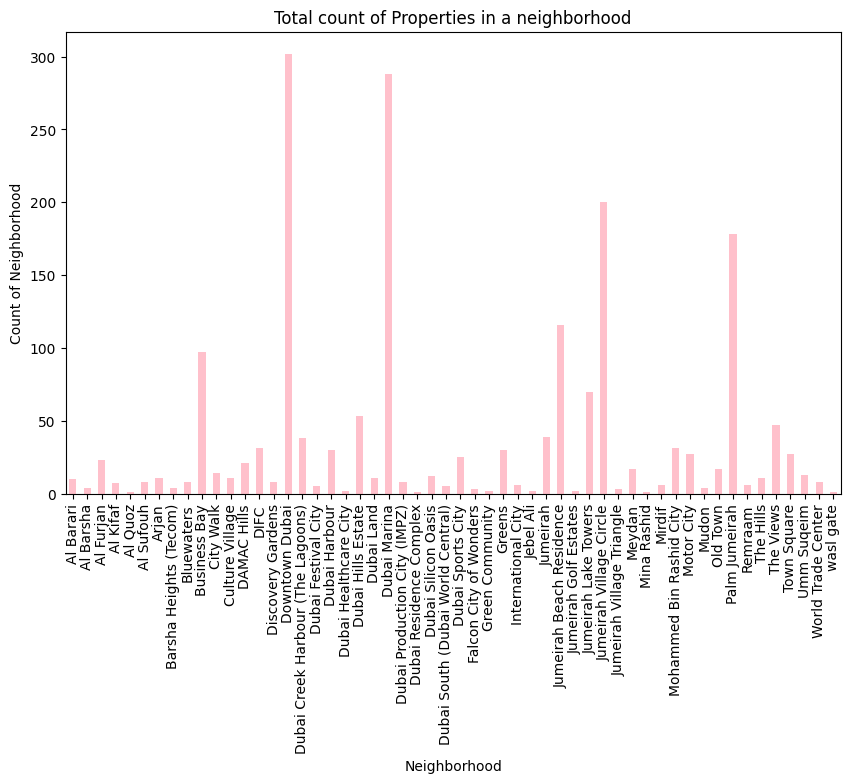

In [10]:
plt.figure(figsize=(10,6))
df['neighborhood'].value_counts().sort_index(ascending=True).plot(kind='bar',color='pink')
plt.title('Total count of Properties in a neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Count of Neighborhood')
plt.show()

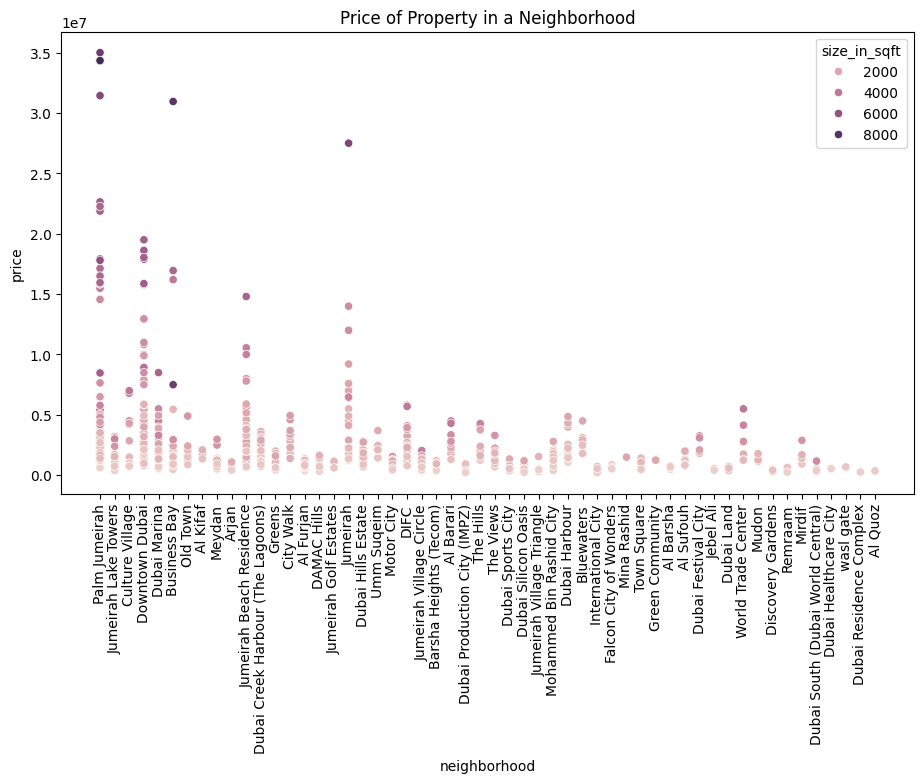

In [11]:
plt.figure(figsize=(11,6))
sns.scatterplot(x = 'neighborhood', y = 'price', data = df, hue = 'size_in_sqft')
plt.xticks(rotation=90)
plt.title('Price of Property in a Neighborhood')
plt.show()

In [12]:
df = df.drop(columns = ['id', 'latitude', 'longitude'], axis=1)

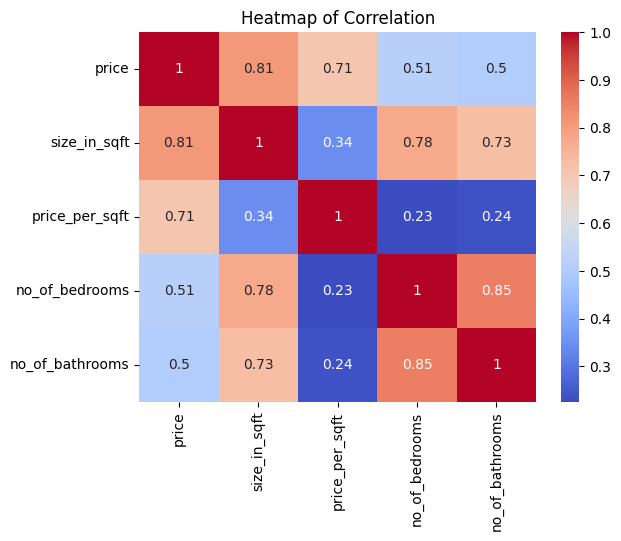

In [13]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])
cr = numeric_df.corr()
plt.title('Heatmap of Correlation')
sns.heatmap(cr, annot=True, cmap='coolwarm')
plt.show()

In [14]:
df.columns

Index(['neighborhood', 'price', 'size_in_sqft', 'price_per_sqft',
       'no_of_bedrooms', 'no_of_bathrooms', 'quality', 'maid_room',
       'unfurnished', 'balcony', 'barbecue_area', 'built_in_wardrobes',
       'central_ac', 'childrens_play_area', 'childrens_pool', 'concierge',
       'covered_parking', 'kitchen_appliances', 'lobby_in_building',
       'maid_service', 'networked', 'pets_allowed', 'private_garden',
       'private_gym', 'private_jacuzzi', 'private_pool', 'security',
       'shared_gym', 'shared_pool', 'shared_spa', 'study', 'vastu_compliant',
       'view_of_landmark', 'view_of_water', 'walk_in_closet'],
      dtype='object')

In [15]:
df = df[['neighborhood', 'price', 'size_in_sqft',
       'no_of_bedrooms', 'no_of_bathrooms', 'quality',
       'unfurnished', 'balcony', 'built_in_wardrobes',
       'central_ac', 'childrens_play_area',
       'covered_parking', 'lobby_in_building',
       'maid_service', 'pets_allowed',
       'private_pool', 'security',
       'shared_gym',
       'view_of_landmark', 'view_of_water']]

In [16]:
df.head()

,neighborhood,price,size_in_sqft,no_of_bedrooms,no_of_bathrooms,quality,unfurnished,balcony,built_in_wardrobes,central_ac,childrens_play_area,covered_parking,lobby_in_building,maid_service,pets_allowed,private_pool,security,shared_gym,view_of_landmark,view_of_water
0,Palm Jumeirah,2700000,1079,1,2,Medium,False,True,False,True,True,False,False,False,True,False,False,True,False,True
1,Palm Jumeirah,2850000,1582,2,2,Medium,False,True,True,True,True,False,False,False,False,False,False,True,False,True
2,Jumeirah Lake Towers,1150000,1951,3,5,Medium,True,True,True,False,False,True,False,False,False,False,True,True,True,True
3,Culture Village,2850000,2020,2,3,Low,True,True,False,False,False,True,False,False,True,False,False,False,False,False
4,Palm Jumeirah,1729200,507,0,1,Medium,False,False,True,True,False,True,False,False,False,False,True,True,True,True


In [17]:
encoder = LabelEncoder()
df['neighborhood_E'] = encoder.fit_transform(df['neighborhood'])
df['quality_E'] = encoder.fit_transform(df['quality'])
df['unfurnished_E'] = encoder.fit_transform(df['unfurnished'])
df['balcony_E'] = encoder.fit_transform(df['balcony'])
df['built_in_wardrobes_E'] = encoder.fit_transform(df['built_in_wardrobes'])
df['central_ac_E'] = encoder.fit_transform(df['central_ac'])
df['childrens_play_area_E'] = encoder.fit_transform(df['childrens_play_area'])
df['covered_parking_E'] = encoder.fit_transform(df['covered_parking'])
df['lobby_in_building_E'] = encoder.fit_transform(df['lobby_in_building'])
df['maid_service_E'] = encoder.fit_transform(df['maid_service'])
df['pets_allowed_E'] = encoder.fit_transform(df['pets_allowed'])
df['private_pool_E'] = encoder.fit_transform(df['private_pool'])
df['security_E'] = encoder.fit_transform(df['security'])
df['shared_gym_E'] = encoder.fit_transform(df['shared_gym'])
df['view_of_landmark_E'] = encoder.fit_transform(df['view_of_landmark'])
df['view_of_water_E'] = encoder.fit_transform(df['view_of_water'])


In [18]:
df.head()

,neighborhood,price,size_in_sqft,no_of_bedrooms,no_of_bathrooms,quality,unfurnished,balcony,built_in_wardrobes,central_ac,childrens_play_area,covered_parking,lobby_in_building,maid_service,pets_allowed,private_pool,security,shared_gym,view_of_landmark,view_of_water,neighborhood_E,quality_E,unfurnished_E,balcony_E,built_in_wardrobes_E,central_ac_E,childrens_play_area_E,covered_parking_E,lobby_in_building_E,maid_service_E,pets_allowed_E,private_pool_E,security_E,shared_gym_E,view_of_landmark_E,view_of_water_E
0,Palm Jumeirah,2700000,1079,1,2,Medium,False,True,False,True,True,False,False,False,True,False,False,True,False,True,46,2,0,1,0,1,1,0,0,0,1,0,0,1,0,1
1,Palm Jumeirah,2850000,1582,2,2,Medium,False,True,True,True,True,False,False,False,False,False,False,True,False,True,46,2,0,1,1,1,1,0,0,0,0,0,0,1,0,1
2,Jumeirah Lake Towers,1150000,1951,3,5,Medium,True,True,True,False,False,True,False,False,False,False,True,True,True,True,36,2,1,1,1,0,0,1,0,0,0,0,1,1,1,1
3,Culture Village,2850000,2020,2,3,Low,True,True,False,False,False,True,False,False,True,False,False,False,False,False,11,1,1,1,0,0,0,1,0,0,1,0,0,0,0,0
4,Palm Jumeirah,1729200,507,0,1,Medium,False,False,True,True,False,True,False,False,False,False,True,True,True,True,46,2,0,0,1,1,0,1,0,0,0,0,1,1,1,1


In [19]:
df = df.drop(columns = ['neighborhood', 'quality',
       'unfurnished', 'balcony', 'built_in_wardrobes',
       'central_ac', 'childrens_play_area',
       'covered_parking', 'lobby_in_building',
       'maid_service', 'pets_allowed',
       'private_pool', 'security',
       'shared_gym',
       'view_of_landmark', 'view_of_water'], axis=1)

In [20]:
X = df.drop(columns = 'price')
y = df['price']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [22]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [23]:
model = LinearRegression()

In [24]:
model.fit(X_train_scaled, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [25]:
y_pred = model.predict(X_test_scaled)

In [26]:
X_train.head()

,size_in_sqft,no_of_bedrooms,no_of_bathrooms,neighborhood_E,quality_E,unfurnished_E,balcony_E,built_in_wardrobes_E,central_ac_E,childrens_play_area_E,covered_parking_E,lobby_in_building_E,maid_service_E,pets_allowed_E,private_pool_E,security_E,shared_gym_E,view_of_landmark_E,view_of_water_E
812,2408,3,3,50,2,1,0,1,1,1,0,0,0,0,0,0,1,1,0
141,2310,3,4,15,2,0,1,1,0,0,0,0,0,0,0,0,1,0,1
1302,2414,3,4,46,2,1,1,1,1,0,1,1,0,0,0,1,0,1,0
1124,1592,2,3,37,3,1,1,1,1,1,1,1,1,1,0,1,1,1,1
1779,947,1,2,14,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0


In [27]:
mae  = mean_absolute_error(y_test, y_pred)
mse  = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)
r2   = r2_score(y_test, y_pred)

print("Mean Absolute Error(MAE)  :", mae)
print("Mean Squared Error(MSE)  :", mse)
print("RMSE :", rmse)
print("R² Score :", r2)

Mean Absolute Error(MAE)  : 941086.9488588637
Mean Squared Error(MSE)  : 2295646183123.7744
RMSE : 2295646183123.7744
R² Score : 0.7170809839975838


In [28]:
#Prediction for new request
new_price = [[2570, 2, 2, 50, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1 ,0]]
new_price_scaled = scaler.transform(new_price)

In [29]:
print("Price for your House is : ", model.predict(new_price_scaled))

Price for your House is :  [4371972.54387984]


In [30]:
#Prediction for new request
new_price = [[3550, 3, 4, 10, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1 ,0]]
new_price_scaled = scaler.transform(new_price)

In [31]:
print("Price for your House is : ", model.predict(new_price_scaled))

Price for your House is :  [6748135.06042604]


In [40]:
# List of feature names in correct order
features = [
    "size_in_sqft", "no_of_bedrooms", "no_of_bathrooms", "neighborhood_E",
    "quality_E", "unfurnished_E", "balcony_E", "built_in_wardrobes_E",
    "central_ac_E", "childrens_play_area_E", "covered_parking_E",
    "lobby_in_building_E", "maid_service_E", "pets_allowed_E",
    "private_pool_E", "security_E", "shared_gym_E",
    "view_of_landmark_E", "view_of_water_E"
]

user_input = []

print("Enter values for the new house request:")
for col in features:
    val = input(f"Enter {col} (default=0): ") or 0 
    user_input.append(float(val))

# Converting into 2D list for model
new_data = [user_input]

new_data_scaled = scaler.transform(new_data)

# Predict
pred = model.predict(new_data_scaled)
print("Predicted Price for this house is:", pred)


Enter values for the new house request:


Enter size_in_sqft (default=0):  2789
Enter no_of_bedrooms (default=0):  1
Enter no_of_bathrooms (default=0):  1
Enter neighborhood_E (default=0):  1
Enter quality_E (default=0):  1
Enter unfurnished_E (default=0):  1
Enter balcony_E (default=0):  1
Enter built_in_wardrobes_E (default=0):  1
Enter central_ac_E (default=0):  11
Enter childrens_play_area_E (default=0):  1
Enter covered_parking_E (default=0):  1
Enter lobby_in_building_E (default=0):  1
Enter maid_service_E (default=0):  1
Enter pets_allowed_E (default=0):  1
Enter private_pool_E (default=0):  1
Enter security_E (default=0):  1
Enter shared_gym_E (default=0):  1
Enter view_of_landmark_E (default=0):  1
Enter view_of_water_E (default=0):  0


Predicted Price for this house is: [11186580.55313144]


In [41]:
# 1 Predicted Price for this house is: 11186580.553131437 with [0]
# 2 Predicted Price for this house is: [11186580.55313144] without [0]